**Importing the libraries**


In [116]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**


In [118]:
df=pd.read_csv('Trip.csv')

In [119]:

df.head()

,City,Place,Ratings,Distance(Km),Time Duration,Images
0,Manali,Capture the Sceneries of Old Manali,3.9,2,1.0,https://i0.wp.com/jannattravelguru.com/wp-cont...
1,Manali,Engage in the Adventures of Solang Valley,4.6,8,4.0,https://encrypted-tbn0.gstatic.com/images?q=tb...
2,Manali,Jogini Waterfall,4.6,4,6.0,https://encrypted-tbn0.gstatic.com/images?q=tb...
3,Manali,Hadimba Temple,4.4,1,2.0,https://encrypted-tbn0.gstatic.com/images?q=tb...
4,Manali,Rohtang Pass,4.4,16,3.0,https://encrypted-tbn0.gstatic.com/images?q=tb...


**Some information about the dataset**


In [121]:
df.describe()

,Ratings,Time Duration
count,1668.000000,2963.000000
mean,3.607374,3.014857
std,0.461082,8.931240
min,2.900000,0.400000
25%,3.200000,1.000000
50%,3.500000,2.000000
75%,4.000000,3.000000
max,5.000000,322.000000


In [122]:
df.columns

Index(['City', 'Place', 'Ratings', 'Distance(Km)', 'Time Duration', 'Images'], dtype='object')

**Finding the null values in the dataset**


In [124]:
df.isnull().sum()

City                2
Place               2
Ratings          1301
Distance(Km)      223
Time Duration       6
Images              2
dtype: int64

In [125]:
print(f"There are {df.isnull().sum().sum()} null values in the dataset now. ")

There are 1536 null values in the dataset now. 


**Filling up the null values and deleting unnecessary rows**

In [127]:
df["Ratings"] = df["Ratings"].fillna(round(df["Ratings"].mean(), 2))

df=df.drop(2968)
df=df.drop(81)

In [128]:
df["Distance(Km)"] = df["Distance(Km)"].astype(str)
df["Distance(Km)"] = df["Distance(Km)"].str.replace(",", "", regex=True)
df["Distance(Km)"] = pd.to_numeric(df["Distance(Km)"], errors="coerce")
df["Distance(Km)"] = df.groupby("City")["Distance(Km)"].transform(lambda x: x.fillna(x.mean()))
df["City"] = df["City"].str.strip()






In [129]:
df = df.dropna(subset=['Distance(Km)','Time Duration'])



**After filling up the null values**

In [131]:
df.isnull().sum()

City             0
Place            0
Ratings          0
Distance(Km)     0
Time Duration    0
Images           0
dtype: int64

In [132]:
print(f"There are {df.isnull().sum().sum()} null values in the dataset now. ")

There are 0 null values in the dataset now. 


In [133]:
df.isnull().sum()

City             0
Place            0
Ratings          0
Distance(Km)     0
Time Duration    0
Images           0
dtype: int64

**Reseting the index of the samples in the dataset**

In [135]:
df = df.reset_index(drop=True)


**All the unique cities present in the dataset**

In [137]:
x=df["City"].unique()
x

array(['Manali', 'Leh Ladakh', 'Coorg', 'Andaman', 'Lakshadweep', 'Goa',
       'Udaipur', 'Srinagar', 'Gangtok', 'Munnar', 'Varkala',
       'Mcleodganj', 'Rishikesh', 'Alleppey', 'Darjeeling', 'Nainital',
       'Shimla', 'Ooty', 'Jaipur', 'Lonavala', 'Mussoorie', 'Kodaikanal',
       'Dalhousie', 'Pachmarhi', 'Varanasi', 'Mumbai', 'Agra', 'Kolkata',
       'Jodhpur', 'Bangalore', 'Amritsar', 'Delhi', 'Jaisalmer',
       'Mount Abu', 'Wayanad', 'Hyderabad', 'Pondicherry', 'Khajuraho',
       'Chennai', 'Vaishno Devi', 'Haridwar', 'Kanyakumari', 'Pune',
       'Kochi', 'Ahmedabad', 'Mysore', 'Chandigarh', 'Hampi', 'Gulmarg',
       'Almora', 'Shirdi', 'Auli', 'Madurai', 'Bodh Gaya',
       'Mahabaleshwar', 'Visakhapatnam', 'Kasol', 'Nashik', 'Tirupati',
       'Ujjain', 'Jim Corbett National Park', 'Gwalior', 'Mathura',
       'Alibaug', 'Rameshwaram', 'Vrindavan', 'Coimbatore', 'Lucknow',
       'Digha', 'Dharamshala', 'Kovalam', 'Madikeri', 'Matheran',
       'Ranthambore', 'Agartal

In [138]:
print(f"There are {len(x)} cities present in the dataset.")

There are 94 cities present in the dataset.


**Minmum and maximum ratings of different cities**

In [140]:
y = df.groupby("City")["Ratings"].agg(["max", "min"]).reset_index()
print(y)

             City  max  min
0        Agartala  4.3  3.2
1            Agra  4.9  3.0
2       Ahmedabad  4.3  3.0
3           Ajmer  4.5  3.2
4         Alibaug  4.5  3.0
..            ...  ...  ...
89       Varanasi  4.4  3.6
90        Varkala  4.4  3.2
91  Visakhapatnam  4.2  3.0
92      Vrindavan  4.3  3.2
93        Wayanad  4.3  3.2

[94 rows x 3 columns]


**Visualisation**

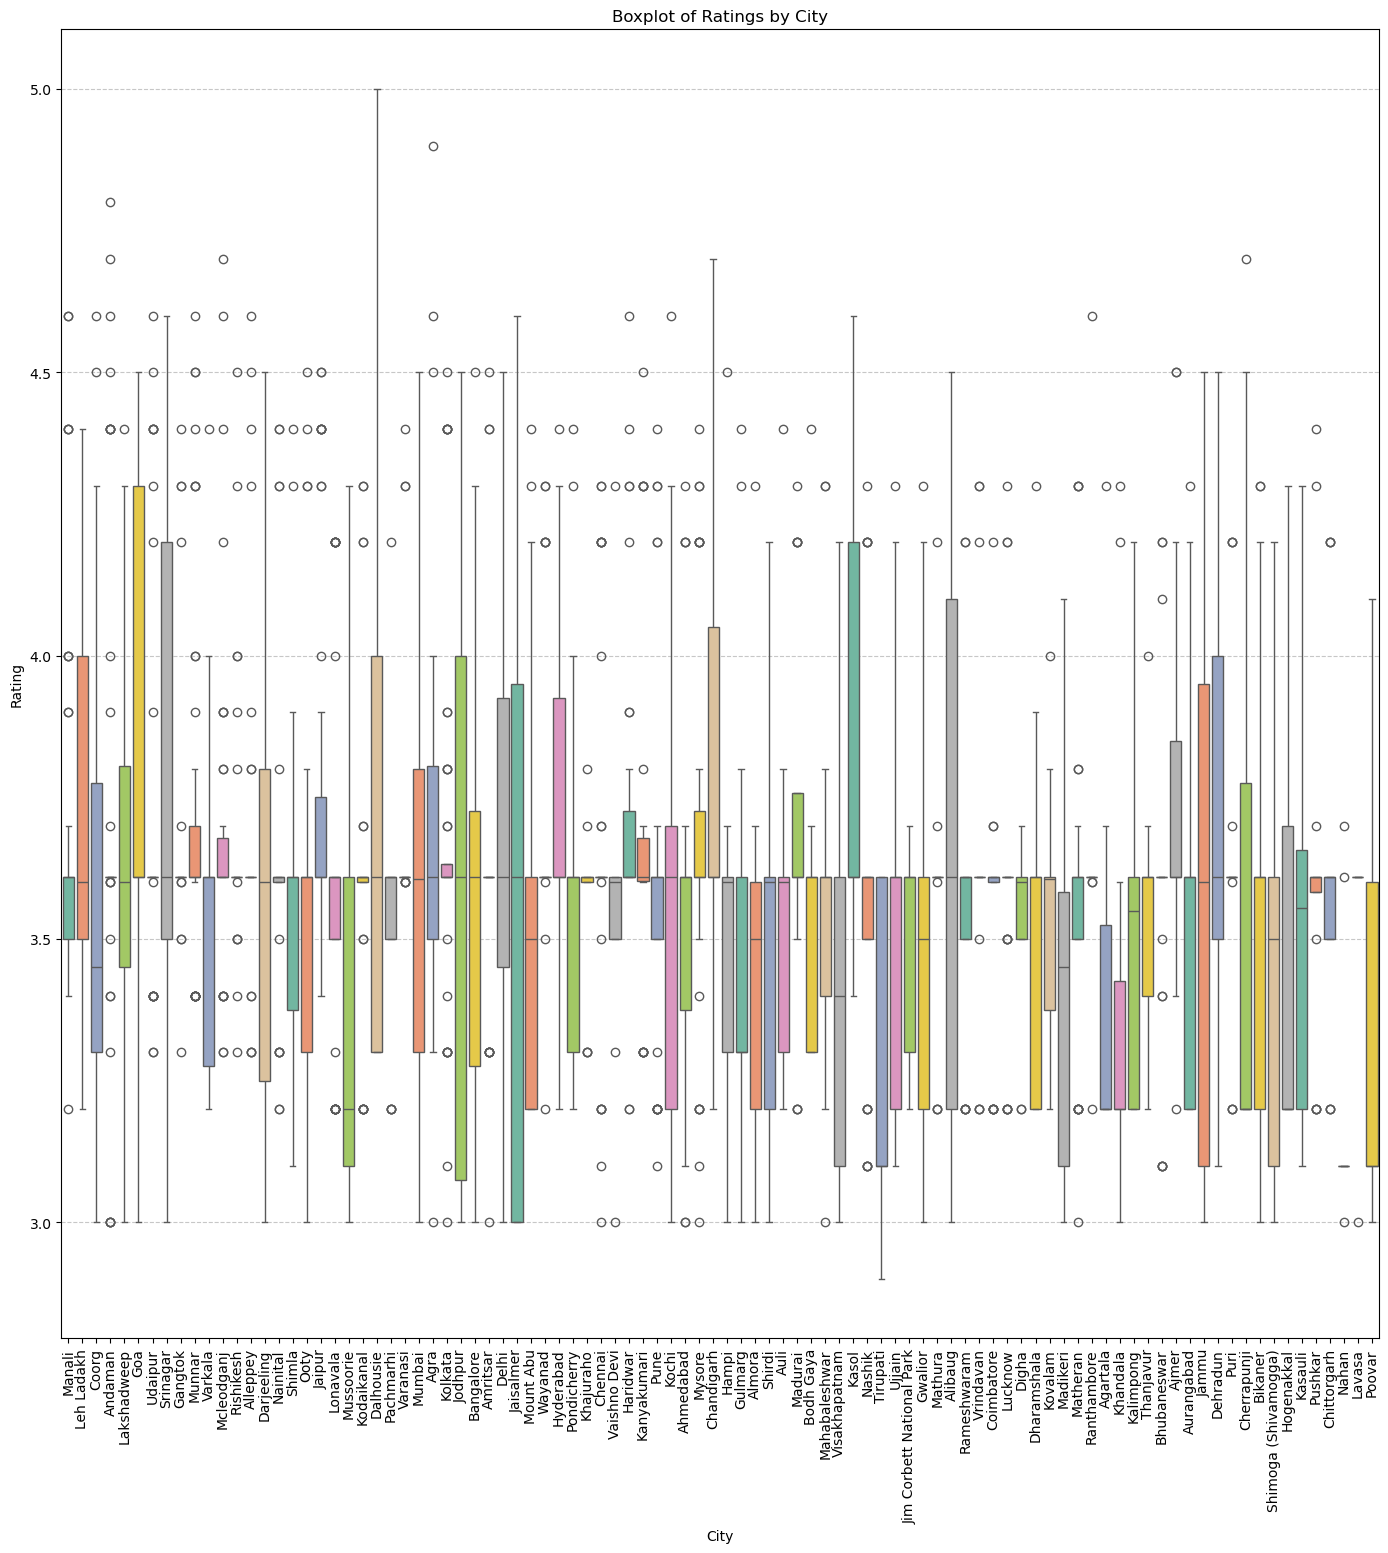

In [142]:
plt.figure(figsize=(17, 17))
sns.boxplot(x="City", y="Ratings", data=df, hue="City", palette="Set2", dodge=False, legend=False)
plt.title("Boxplot of Ratings by City")
plt.xlabel("City")
plt.ylabel("Rating")
plt.xticks(rotation=90) 
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

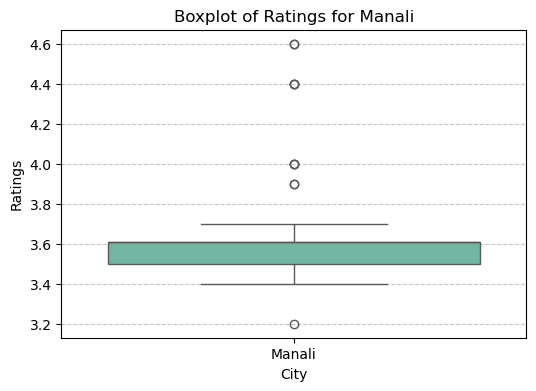

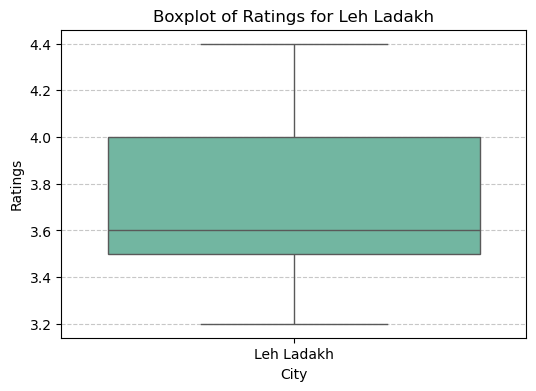

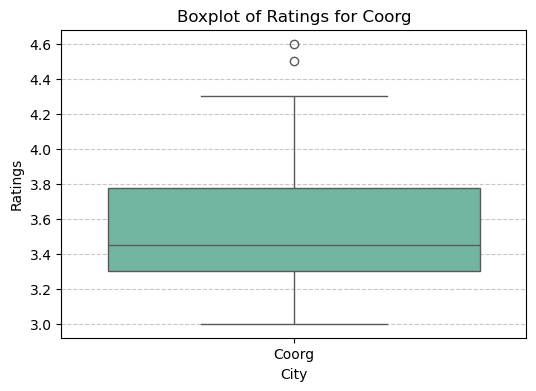

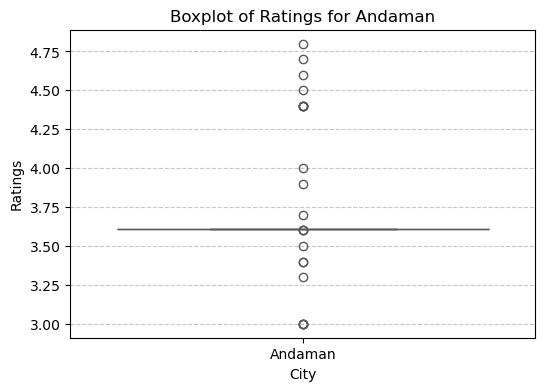

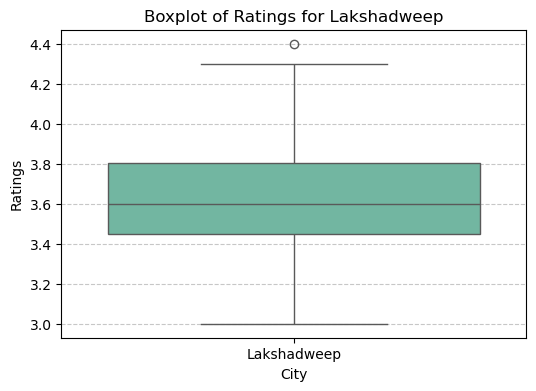

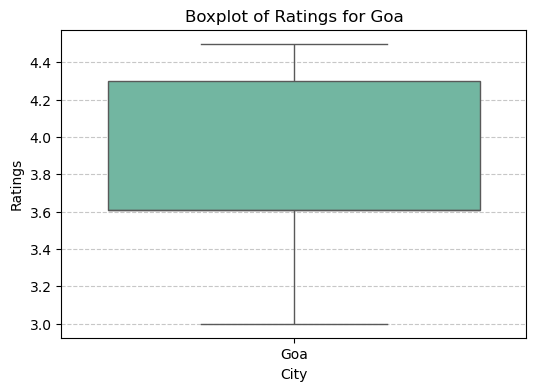

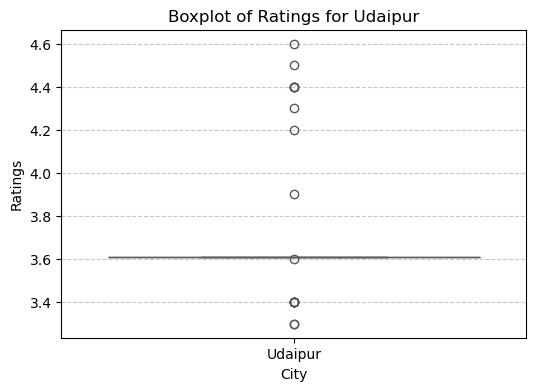

In [ ]:
cities = df["City"].unique()
for city in cities:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="City", y="Ratings", data=df[df["City"] == city], hue="City", palette="Set2", dodge=False)
    plt.title(f"Boxplot of Ratings for {city}")
    plt.xlabel("City")
    plt.ylabel("Ratings")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

In [ ]:

df.head()

**Recommender function**

In [ ]:
model = NearestNeighbors(n_neighbors=3, metric="euclidean")

In [ ]:
def recommend_trip(city, rating, distance, duration):
    city_data = df[df["City"].str.lower() == city.lower()]

    if city_data.empty:
        print(f"\nSorry, we don't have recommendations for the city '{city}'.")
        return


    filtered_data = city_data[city_data["Ratings"] >= rating]

    if filtered_data.empty:
        print(f"\nNo recommendations in {city} with a rating of {rating} or higher.")
        return

    features = filtered_data[["Ratings", "Distance(Km)", "Time Duration"]].values
    model.fit(features)

    query = [[rating, distance, duration]]

    distances, indices = model.kneighbors(query)


    recommendations = filtered_data.iloc[indices[0]]

    print(f"\n\nRecommended Places and Activities for Your Trip in {city} 🚗:")
    for _, row in recommendations.iterrows():
        print(f"- {row['Place']} (Rating: {row['Ratings']})")
        display(HTML(f"<img src='{row['Images']}' style='width:300px;height:200px;'>"))


**Taking user inputs such as city name, minimum ratings, maximum distance in km, maximum time the user has for exploration**

In [ ]:
user_city = input("Enter the city: ").strip()
user_rating = float(input("Enter your preferred minimum rating (e.g., 4.0): "))
user_distance = float(input("Enter your maximum distance from the city center (in km): "))
user_duration = float(input("Enter the maximum time you have for exploring (in hours): "))

recommend_trip(user_city, user_rating, user_distance, user_duration)

**Above are the recommended places and activities for the requested city**

**Saving the model and the cleaned dataset for deployment using streamlit**

In [ ]:
import joblib

df.to_csv("cleaned_trip_data.csv", index=False)  # Saving cleaned dataset
joblib.dump(model, "trip_recommendation_model_final.pkl")  # Saving the model
